In [10]:
import pandas as pd
import io
import os

In [18]:
# Change your file path as per necessary
state_of_the_union_data = pd.read_csv(r"C:\Users\state-of-the-union.csv")
state_of_the_union_data

,year,text
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...
5,1794,\nState of the Union Address\nGeorge Washingto...
6,1795,\nState of the Union Address\nGeorge Washingto...
7,1796,\nState of the Union Address\nGeorge Washingto...
8,1797,\nState of the Union Address\nJohn Adams\nNove...
9,1798,\nState of the Union Address\nJohn Adams\nDece...


In [9]:
state_of_the_union_data.shape

(226, 2)

In [0]:
state_of_the_union_data = state_of_the_union_data.dropna().reset_index(drop=True)

In [11]:
state_of_the_union_data.shape

(155, 2)

In [0]:
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

In [0]:
pip install tqdm --upgrade

In [13]:
state_of_the_union_data.columns

Index(['year', 'text'], dtype='object')

In [20]:
state_of_the_union_data['sentences'] = state_of_the_union_data.text.progress_map(sent_tokenize)
state_of_the_union_data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

['George Washington\nJanuary 8, 1790\n\nFellow-Citizens of the Senate and House of Representatives:\n\nI embrace with great satisfaction the opportunity which now presents itself\nof congratulating you on the present favorable prospects of our public\naffairs.',
 'The recent accession of the important state of North Carolina to\nthe Constitution of the United States (of which official information has\nbeen received), the rising credit and respectability of our country, the\ngeneral and increasing good will toward the government of the Union, and\nthe concord, peace, and plenty with which we are blessed are circumstances\nauspicious in an eminent degree to our national prosperity.',
 'In resuming your consultations for the general good you can not but derive\nencouragement from the reflection that the measures of the last session\nhave been as satisfactory to your constituents as the novelty and\ndifficulty of the work allowed you to hope.']

In [0]:
from nltk.tokenize import word_tokenize

In [22]:
state_of_the_union_data['tokens_sentences'] = state_of_the_union_data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(state_of_the_union_data['tokens_sentences'].head(1).tolist()[0][:3])


[['George', 'Washington', 'January', '8', ',', '1790', 'Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives', ':', 'I', 'embrace', 'with', 'great', 'satisfaction', 'the', 'opportunity', 'which', 'now', 'presents', 'itself', 'of', 'congratulating', 'you', 'on', 'the', 'present', 'favorable', 'prospects', 'of', 'our', 'public', 'affairs', '.'], ['The', 'recent', 'accession', 'of', 'the', 'important', 'state', 'of', 'North', 'Carolina', 'to', 'the', 'Constitution', 'of', 'the', 'United', 'States', '(', 'of', 'which', 'official', 'information', 'has', 'been', 'received', ')', ',', 'the', 'rising', 'credit', 'and', 'respectability', 'of', 'our', 'country', ',', 'the', 'general', 'and', 'increasing', 'good', 'will', 'toward', 'the', 'government', 'of', 'the', 'Union', ',', 'and', 'the', 'concord', ',', 'peace', ',', 'and', 'plenty', 'with', 'which', 'we', 'are', 'blessed', 'are', 'circumstances', 'auspicious', 'in', 'an', 'eminent', 'degree', 'to', 'our', 'nation

In [0]:
from nltk import pos_tag

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [26]:
state_of_the_union_data['POS_tokens'] = state_of_the_union_data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(state_of_the_union_data['POS_tokens'].head(1).tolist()[0][:3])


[[('George', 'NNP'), ('Washington', 'NNP'), ('January', 'NNP'), ('8', 'CD'), (',', ','), ('1790', 'CD'), ('Fellow-Citizens', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Senate', 'NNP'), ('and', 'CC'), ('House', 'NNP'), ('of', 'IN'), ('Representatives', 'NNPS'), (':', ':'), ('I', 'PRP'), ('embrace', 'VBP'), ('with', 'IN'), ('great', 'JJ'), ('satisfaction', 'NN'), ('the', 'DT'), ('opportunity', 'NN'), ('which', 'WDT'), ('now', 'RB'), ('presents', 'VBZ'), ('itself', 'PRP'), ('of', 'IN'), ('congratulating', 'VBG'), ('you', 'PRP'), ('on', 'IN'), ('the', 'DT'), ('present', 'JJ'), ('favorable', 'JJ'), ('prospects', 'NNS'), ('of', 'IN'), ('our', 'PRP$'), ('public', 'JJ'), ('affairs', 'NNS'), ('.', '.')], [('The', 'DT'), ('recent', 'JJ'), ('accession', 'NN'), ('of', 'IN'), ('the', 'DT'), ('important', 'JJ'), ('state', 'NN'), ('of', 'IN'), ('North', 'NNP'), ('Carolina', 'NNP'), ('to', 'TO'), ('the', 'DT'), ('Constitution', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), (

In [0]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
# Lemmatizing each word with its POS tag, in each sentence
state_of_the_union_data['tokens_sentences_lemmatized'] = state_of_the_union_data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [0]:
state_of_the_union_data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

**Removing stop words**

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [0]:
state_of_the_union_data_stop_words_verbs = ['State of the Union Address', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
state_of_the_union_data_stop_words_other = ['August', 'one', 'January', 'mr', 'February', 'image', 'March', 'de', 'September', 'en', 'July', 'caption', 'April', 'also', 'October', 'copyright', 'May', 'something', 'June', 'getty', 'November', 'December']
my_stopwords = state_of_the_union_data_stop_words_verbs + state_of_the_union_data_stop_words_other

In [0]:
from itertools import chain

In [0]:
state_of_the_union_data['tokens'] = state_of_the_union_data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
state_of_the_union_data['tokens'] = state_of_the_union_data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [0]:
state_of_the_union_data['tokens'].head(1).tolist()[0][:30]

**LDA Prepare Data**

In [0]:
from gensim.models import Phrases

In [47]:
tokens = state_of_the_union_data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


**Prepare object for our model**

In [0]:
from gensim import corpora

In [0]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

**LDA Start**

In [0]:
from gensim import models
import numpy as np

In [51]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 8.33 s, sys: 5.48 s, total: 13.8 s
Wall time: 7.03 s


**20 topics and top 10 words**

In [70]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.006*"vessel" + 0.004*"arm" + 0.003*"her" + 0.003*"former" + 0.003*"occasion" + 0.003*"officer" + 0.003*"object" + 0.003*"claim" + 0.003*"coast" + 0.003*"ought" + 0.003*"commission" + 0.002*"desirable" + 0.002*"admit" + 0.002*"sum" + 0.002*"article" + 0.002*"spain" + 0.002*"sea_men" + 0.002*"information" + 0.002*"enemy" + 0.002*"she"

1: 0.006*"let" + 0.005*"why" + 0.005*"americans" + 0.004*"century" + 0.004*"tonight" + 0.003*"struggle" + 0.003*"budget" + 0.003*"commitment" + 0.003*"reform" + 0.003*"job" + 0.002*"next" + 0.002*"aggression" + 0.002*"try" + 0.002*"leadership" + 0.002*"achieve" + 0.002*"washington" + 0.002*"investment" + 0.002*"deficit" + 0.002*"afghanistan" + 0.002*"around"

2: 0.004*"great_britain" + 0.003*"navy" + 0.003*"claim" + 0.003*"commence" + 0.003*"last_session" + 0.003*"portion" + 0.003*"colony" + 0.002*"object" + 0.002*"convention" + 0.002*"vessel" + 0.002*"burden" + 0.002*"estimate" + 0.002*"charge" + 0.002*"article" + 0.002*"bear" + 0.002*"commercial" + 

In [53]:
print(state_of_the_union_data.text.loc[0][:500])

George Washington
January 8, 1790

Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents itself
of congratulating you on the present favorable prospects of our public
affairs. The recent accession of the important state of North Carolina to
the Constitution of the United States (of which official information has
been received), the rising credit and respectability of our country, the
general and increasing good will towa


In [54]:
lda_model[corpus[0]]

[(10, 0.9992584)]

In [0]:
topics = [lda_model[corpus[i]] for i in range(len(state_of_the_union_data))]

**Advanced exploration**

In [58]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [0]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [60]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.999258,0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.999423,0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.095962,0.0,0.0,0.0,0.0,0.851464,0,0.0,0.052263,0.0,0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.065148,0.0,0.0,0.0,0.0,0.779687,0,0.0,0.154818,0.0,0,0.0,0.0,0.0,0.0
4,0.217577,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.782050,0,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0


In [61]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

111    0.999819
121    0.999807
114    0.999785
140    0.996863
119    0.996442
117    0.996166
138    0.994493
112    0.920222
127    0.910494
103    0.882648
125    0.871787
113    0.866186
90     0.861454
131    0.851092
96     0.807323
105    0.798687
108    0.746438
106    0.742577
118    0.734958
91     0.732035
Name: 14, dtype: float64

In [64]:
print(state_of_the_union_data.text.loc[91][:1000])


State of the Union Address
Harry S. Truman
January 7, 1948

Mr. President, Mr. Speaker, and Members of the 80th Congress:

We are here today to consider the state of the Union.

On this occasion, above all others, the Congress and the President should
concentrate their attention, not upon party but upon the country; not upon
things which divide us but upon those which bind us together--the enduring
principles of our American system, and our common aspirations for the
future welfare and security of the people of the United States.

The United States has become great because [p.2] we, as a people, have been
able to work together for great objectives even while differing about
details.

The elements of our strength are many. They include our democratic
government, our economic system, our great natural resources. But these are
only partial explanations.

The basic source of our strength is spiritual. For we are a people with a
faith. We believe in the dignity of man. We believe that he w

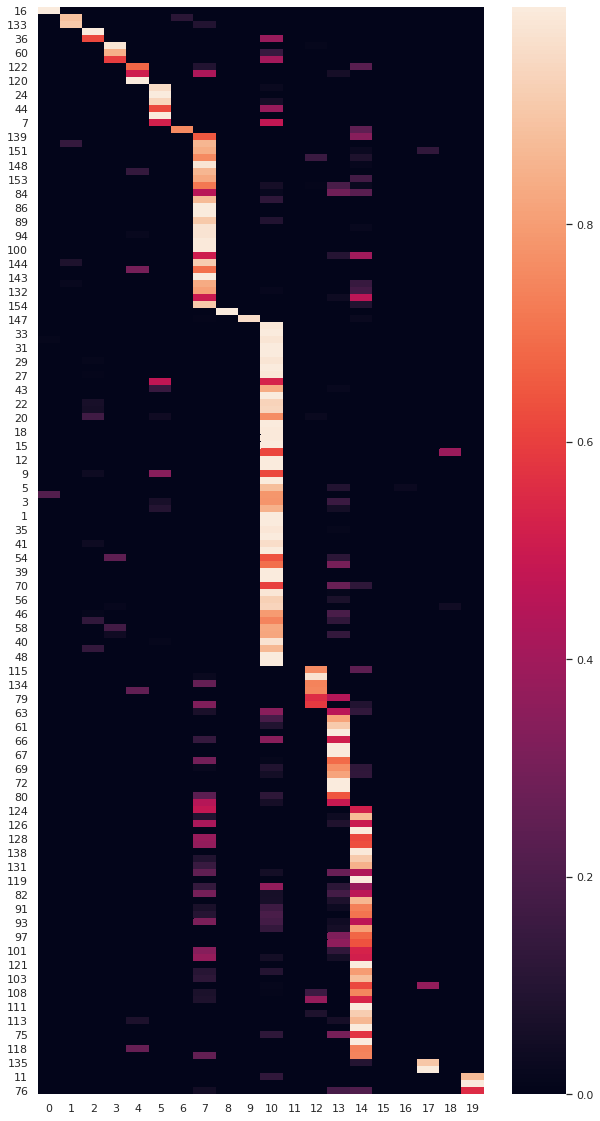

In [65]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

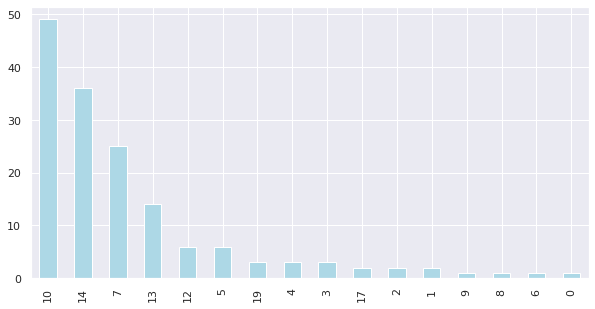

In [66]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [0]:
pip install pyLDAvis

In [0]:
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)